In [1]:
from vmk_spectrum3_wrapper.data import Data
from vmk_spectrum3_wrapper.device import Device
from vmk_spectrum3_wrapper.filter import CorePreset

In [2]:
exposure = 10
capacity = 1

In [3]:
device = Device()
device = device.connect()

In [4]:
device = device.setup(
    exposure=exposure,
    capacity=capacity,
)

#### Calibrate `bias`

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


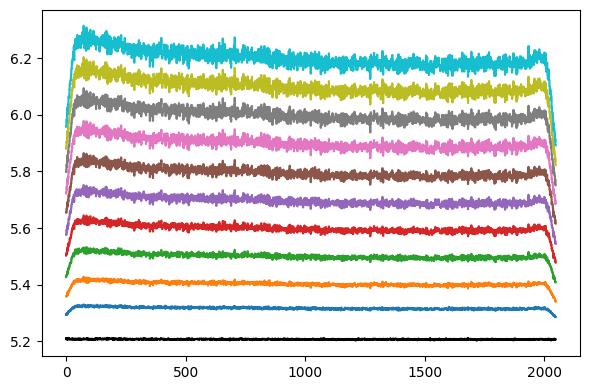

In [5]:
import numpy as np

from vmk_spectrum3_wrapper.calibration import calibrate_bias


bias = calibrate_bias(
    device=device,
    exposure=np.arange(1, 10+1, 1),
    capacity=100,
    show=True,
    save=True,
)

#### Calibrate `dark`

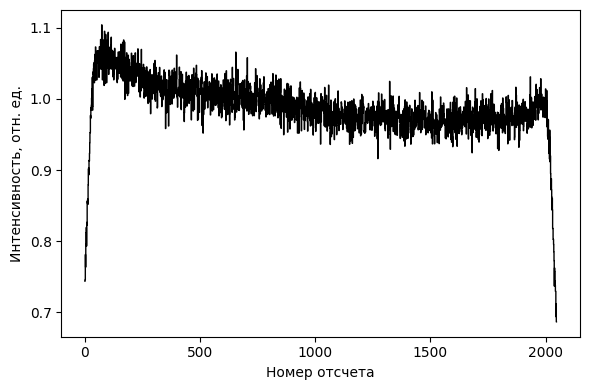

In [6]:
from vmk_spectrum3_wrapper.calibration import calibrate_dark


dark = calibrate_dark(
    device=device,
    exposure=exposure,
    capacity=100,
    bias=Data.load('bias.pkl'),
    show=True,
    save=True,
)

#### Read

In [7]:
n_times = 10
device = device.setup(
    n_times=n_times,
    exposure=exposure,
    capacity=capacity,
    handler=CorePreset(
        bias=Data.load('bias.pkl'),
        dark=Data.load('dark.pkl'),
    ),
)

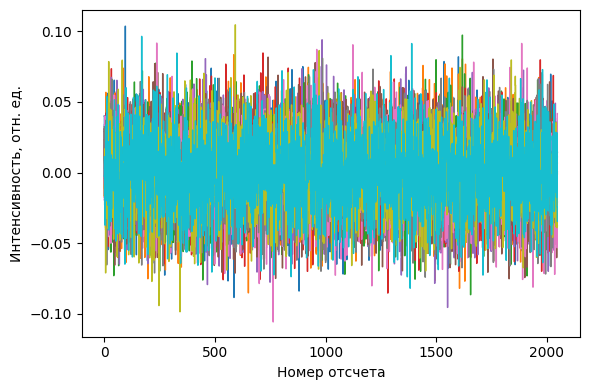

In [8]:
data = device.read()
data.show()